In [ ]:
!git clone https://github.com/keivalya/Robo-AI-recorded.git

Cloning into 'Robo-AI-recorded'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 36 (delta 1), reused 1 (delta 0), pack-reused 30 (from 1)
Receiving objects: 100% (36/36), 46.10 MiB | 22.90 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
# Nodes
class Node():
  def __init__(self, state, parent, action):
    self.state = state
    self.parent = parent
    self.action = action

# DFS
class StackContainer():
  def __init__(self):
    self.container = []

  def add(self, node):
    self.container.append(node)

  def contains_state(self, state):
    for node in self.container:
      if node.state == state:
        return True
    return False

  def empty(self):
    return len(self.container) == 0

  def remove(self):
    if self.empty():
      raise Exception("Container is Empty!")
    else:
      node = self.container[-1] # deleting the last node
      self.container = self.container[:-1]
      return node

# BFS
class QueueContainer(StackContainer):
  def remove(self):
    if self.empty():
      raise Exception("Container is Empty!")
    else:
      node = self.container[0] # deleting the first node
      self.container = self.container[1:]
      return node

Maze:

██    █
██ ██ █
█B █  █
█ ██ ██
     ██
A██████

Solving
States Explored: 17
Solution:

██****█
██*██*█
█B*█**█
█ ██*██
*****██
A██████



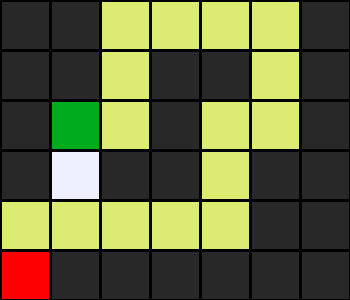

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display
import sys

class Maze():
    def __init__(self, filename):
        # Read file and set height and width of maze
        with open(filename) as f:
            contents = f.read()

        # Validate start and goal
        if contents.count("A") != 1:
            raise Exception("maze must have exactly one start point")
        if contents.count("B") != 1:
            raise Exception("maze must have exactly one goal")

        # Determine height and width of maze
        contents = contents.splitlines()
        self.height = len(contents)
        self.width = max(len(line) for line in contents)

        # Keep track of walls
        self.walls = []
        for i in range(self.height):
            row = []
            for j in range(self.width):
                try:
                    if contents[i][j] == "A":
                        self.start = (i, j)
                        row.append(False)
                    elif contents[i][j] == "B":
                        self.goal = (i, j)
                        row.append(False)
                    elif contents[i][j] == " ":
                        row.append(False)
                    else:
                        row.append(True)
                except IndexError:
                    row.append(False)
            self.walls.append(row)

        self.solution = None

    def print(self):
        solution = self.solution[1] if self.solution is not None else None
        print()
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):
                if col:
                    print("█", end="")
                elif (i, j) == self.start:
                    print("A", end="")
                elif (i, j) == self.goal:
                    print("B", end="")
                elif solution is not None and (i, j) in solution:
                    print("*", end="")
                else:
                    print(" ", end="")
            print()
        print()

    def neighbors(self, state):
        row, col = state
        candidates = [
            ("up", (row - 1, col)),
            ("down", (row + 1, col)),
            ("left", (row, col - 1)),
            ("right", (row, col + 1))
        ]

        result = []
        for action, (r, c) in candidates:
            if 0 <= r < self.height and 0 <= c < self.width and not self.walls[r][c]:
                result.append((action, (r, c)))
        return result

    def solve(self):
        """Finds a solution to maze, if one exists."""

        # Keep track of number of states explored
        self.num_explored = 0

        # Initialize container to just the starting position
        start = Node(state=self.start, parent=None, action=None)
        container = StackContainer() # DFS
        # container = QueueContainer() # BFS
        container.add(start)

        # Initialize an empty explored set
        self.explored = set()

        # Keep looping until solution found
        while True:

            # If nothing left in container, then no path
            if container.empty():
                raise Exception("no solution")

            # Choose a node from the container
            node = container.remove()
            self.num_explored += 1

            # If node is the goal, then we have a solution
            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return

            # Mark node as explored
            self.explored.add(node.state)

            # Add neighbors to container
            for action, state in self.neighbors(node.state):
                if not container.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    container.add(child)

    def output_image(self, show_solution=True, show_explored=True):
        cell_size = 50
        cell_border = 2

        # Create a blank canvas
        img = Image.new(
            "RGBA",
            (self.width * cell_size, self.height * cell_size),
            "black"
        )
        draw = ImageDraw.Draw(img)

        solution = self.solution[1] if self.solution is not None else None
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):

                # Walls
                if col:
                    fill = (40, 40, 40)

                # Start
                elif (i, j) == self.start:
                    fill = (255, 0, 0)

                # Goal
                elif (i, j) == self.goal:
                    fill = (0, 171, 28)

                # Solution
                elif solution is not None and show_solution and (i, j) in solution:
                    fill = (220, 235, 113)

                # Explored
                elif solution is not None and show_explored and (i, j) in self.explored:
                    fill = (212, 97, 85)

                # Empty cell
                else:
                    fill = (237, 240, 252)

                # Draw cell
                draw.rectangle(
                    ([(j * cell_size + cell_border, i * cell_size + cell_border),
                      ((j + 1) * cell_size - cell_border, (i + 1) * cell_size - cell_border)]),
                    fill=fill
                )

        # Display the image in the notebook
        display(img)

# Example usage:
m = Maze('/content/Robo-AI-recorded/2 Artificial Intelligence/maze3.txt') # change
print("Maze:")
m.print()
print("Solving")
m.solve()
print("States Explored:", m.num_explored)
print("Solution:")
m.print()
m.output_image(show_explored=True)